In [1]:
%matplotlib inline
import numpy as np
import phconvert as phc
#print('phconvert version: ' + phc.__version__)
f="/dataB/smfretData/lineardiub/LS3_lineardiUbN25C_N101C_alex488cy5_32MHz 1.ptu"
d=phc.pqreader.load_ptu(f)

In [2]:
print(len(d[0]))

34883384


In [3]:
print(len(d[1]))

34883384


In [4]:
print(len(d[2]))

34883384


In [5]:
print(len(d[3]))

4


In [6]:
import json
#parsed = json.loads(d[3])
print(json.dumps(d[3],indent=4))

{
    "timestamps_unit": 6.249687515624219e-08,
    "tags": {
        "File_GUID": {
            "type": "tyAnsiString",
            "idx": -1,
            "data": "{0745AE31-850B-45BD-908F-563618C68705}",
            "value": 40
        },
        "File_CreatingTime": {
            "type": "tyTDateTime",
            "idx": -1,
            "value": "2017-06-20 17:50:19"
        },
        "$StartedByRemoteInterface": {
            "type": "tyBool8",
            "idx": -1,
            "value": true
        },
        "Measurement_SubMode": {
            "type": "tyInt8",
            "idx": -1,
            "value": 1
        },
        "File_Comment": {
            "type": "tyAnsiString",
            "idx": -1,
            "data": "{First Dichroic Mirror}: 405/488/561/640\r\n{Pinhole Size(um)}: 99.6\r\n{Scan Direction}: One way\r\n{Scanner Zoom}: 1.000\r\n{Scan Speed}: 0.125\r\n{Optics}: Plan Apo IR 60x WI DIC N2",
            "value": 176
        },
        "TTResult_StopReason": {
    

In [7]:
print(int(d[3]["tags"]["TTResult_SyncRate"]['value']))
print(d[3]["timestamps_unit"]+1)

16000800
1.0000000624968752


(array([  1.45186090e+07,   9.26500000e+03,   9.56700000e+03,
          1.17230000e+04,   1.20410000e+04,   1.21800000e+04,
          1.71400000e+04,   1.68700000e+04,   1.33300000e+04,
          1.37050000e+04,   1.39990000e+04,   1.22886700e+06,
          3.37017600e+06,   2.58380300e+06,   1.73866700e+06,
          1.24862300e+06,   8.85808000e+05,   6.96475000e+05,
          5.32307000e+05,   4.14163000e+05,   3.15651000e+05,
          2.63750000e+05,   2.14393000e+05,   1.76356000e+05,
          1.41646000e+05,   1.24402000e+05,   1.06925000e+05,
          9.05730000e+04,   7.56980000e+04,   6.91090000e+04,
          6.04450000e+04,   5.30380000e+04,   4.56770000e+04,
          4.26220000e+04,   3.87480000e+04,   3.46620000e+04,
          3.05380000e+04,   2.94170000e+04,   2.68110000e+04,
          2.49320000e+04,   2.22630000e+04,   2.15750000e+04,
          2.01680000e+04,   1.91650000e+04,   1.72540000e+04,
          1.73520000e+04,   1.65240000e+04,   1.56570000e+04,
        

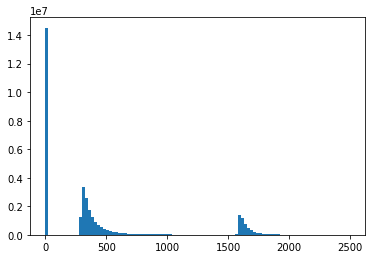

In [8]:
import matplotlib
matplotlib.pyplot.hist(d[2],101)

In [9]:
print(max(d[2]))

2500


In [10]:
for det, count in zip(*np.unique(d[1], return_counts=True)):
    print("%8d   %8d" % (det, count))

       0   11462504
       1    8911562
      65        143
      66        166
      68         50
     127   14508959


In [11]:
nanotimes = d[2]
detectors = d[1]
timestamps = d[0]

not_overflow = d[2] != 0

detectors = detectors[not_overflow]
timestamps = timestamps[not_overflow]
nanotimes = nanotimes[not_overflow]
print("Detector    Counts")
print("--------   --------")
for det, count in zip(*np.unique(detectors, return_counts=True)):
    print("%8d   %8d" % (det, count))


Detector    Counts
--------   --------
       0   11462403
       1    8911506


In [12]:
measurement_specs = dict(
    measurement_type = 'smFRET-nsALEX',
    laser_repetition_rate=int(d[3]["tags"]["TTResult_SyncRate"]['value']),
    detectors_specs = {'spectral_ch1': [1],  # list of donor's detector IDs
                       'spectral_ch2': [0]},  # list of acceptor's detector IDs
    alex_excitation_period1=[10,1240],
    alex_excitation_period2=[1260,2490]
    )
tcspc_num_bins=max(d[2])
nanotimes_specs=dict(
    tcspc_unit=float(d[3]["tags"]["MeasDesc_Resolution"]['value']),
    tcspc_num_bins=tcspc_num_bins,
    tcspc_range=float(d[3]["tags"]["MeasDesc_Resolution"]['value'])*tcspc_num_bins
)
photon_data = dict(
    timestamps=timestamps,
    detectors=detectors,
    timestamps_specs={'timestamps_unit': d[3]["timestamps_unit"]},
    measurement_specs=measurement_specs,
    nanotimes_specs=nanotimes_specs,
    nanotimes=nanotimes
)
setup = dict(
    ## Mandatory fields
    num_pixels = 2,                   # using 2 detectors
    num_spots = 1,                    # a single confoca excitation
    num_spectral_ch = 2,              # donor and acceptor detection 
    num_polarization_ch = 1,          # no polarization selection 
    num_split_ch = 1,                 # no beam splitter
    excitation_cw=[False,False],
    modulated_excitation = True,     # CW excitation, no modulation 
    excitation_alternated = [True,True],  # CW excitation, no modulation 
    lifetime = True                 #  TCSPC in detection
)

description = 'This is a fake dataset which mimics smFRET data.'

author = 'kk'
author_affiliation = 'Name of Research Institution'
identity = dict(
    author=author,
    author_affiliation=author_affiliation)
data = dict(
    description=description,
    photon_data = photon_data,
    setup=setup,
    identity=identity,
)
phc.hdf5.save_photon_hdf5(data, h5_fname='LS3.h5', overwrite=True)

Saving: LS3.h5
Photon-HDF5 WARNING: Missing field "excitation_wavelengths" in "/setup". 
Photon-HDF5 WARNING: Missing field "detection_wavelengths" in "/setup". 


In [13]:
timestamps

array([       2237,        2382,        9298, ..., 38402678615,
       38402680331, 38402685193])

In [14]:
float(d[3]["tags"]["MeasDesc_Resolution"]['value'])

2.50000003337858e-11